[[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0. ]
 [  1.   20.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0. ]
 [  1.5  25.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0. ]
 [  2.5  32.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0. ]
 [  3.5  40.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0. ]
 [  4.   45.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0. ]
 [  5.5  50.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0. ]
 [  6.   55.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0. ]
 [  7.   80.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0. ]
 [  7.5  90.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0. ]
 [  8.5  95.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0. ]
 [  9.5 110.    0.    0.    0.  

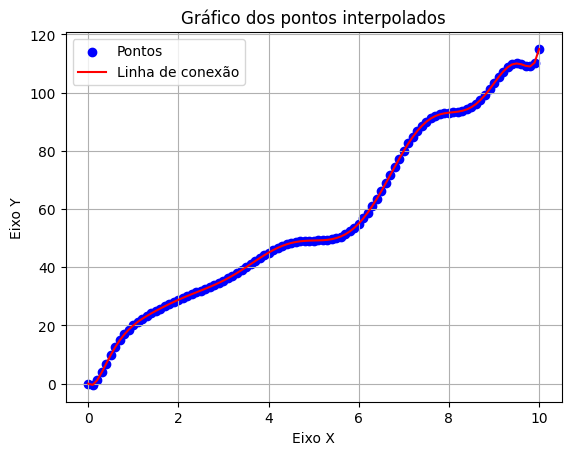

'\nresposta = int(input("Deseja imprimir outro gráfico referente ao polinômio, mas em outro intervalo?\n[0]Não\n[1]Sim"))\n\nif(resposta == 0):\n    repete = False\nelse:\n    repete = True\n\nwhile repete:\n    \n    # intervalo de 0 até n para conseguir os pontos para o gráfico\n    inicio = int(input("Intervalo de: "))\n    fim = int(input("Até: "))\n\n    x = []\n    y = []\n\n    for i in range(inicio,fim):\n        x.append(i) \n        pontoCalculado = calcularPontoNoPolinomio(qntLinhasMatrizTriangular, matrizTriangular, i)\n\n        y.append(pontoCalculado)\n        print("\nP(", i ,") = ", pontoCalculado)\n\n    imprimirGrafico(x,y)\n\n    resposta = int(input("Deseja imprimir outro gráfico referente ao polinômio, mas em outro intervalo?\n[0]Não\n[1]Sim"))\n\n    if(resposta == 0):\n        repete = False\n    else:\n        repete = True\n'

In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import os

def imprimirGrafico(x,y):
    # Criando o gráfico de dispersão e conectando os pontos com linhas
    plt.scatter(x, y, color='blue', marker='o', label='Pontos')
    plt.plot(x, y, color='red', linestyle='-', label='Linha de conexão')

    # Adicionando título e rótulos aos eixos
    plt.title('Gráfico dos pontos interpolados')
    plt.xlabel('Eixo X')
    plt.ylabel('Eixo Y')

    # Adicionando uma grade
    plt.grid(True)

    # Exibindo a legenda
    plt.legend()

    # Exibindo o gráfico
    plt.show()

def pegarDadosCsv():
    T = []

    # Coloca os dados do .csv na matriz T
    with open('pontosQ9.csv', newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')

        pulaLinha1 = True

        for row in spamreader:

            
            if pulaLinha1: # Esse if serve para pula a linha que tem as letras 'x' e 'y'
                pulaLinha1 = False
                continue

            result = row[0].split(',')
            T.append((float(result[0]), float(result[1])))

    return T

def imprimirMultiplicaPolinomio(mT, contador):

    for i in range(contador):
         print("(x -", mT[i][0], ")", end=' ')

def imprimirPolinomio(matrizTriangular):
    print("\nP(x) = ", matrizTriangular[0][1], " + ", end=' ')
    
    contador = 1

    for i in range(2, (qntLinhasMatrizTriangular + 1)):
        print(matrizTriangular[0][i], end=' ')
        imprimirMultiplicaPolinomio(matrizTriangular, contador)

        if qntLinhasMatrizTriangular - 1 == contador: # Esse if serve para não acrescentar um '+' no fim da string do polinômio
            continue

        print("+", end=' ')
        contador += 1

def processaDiferencasDivididas(mT, qntLinhasMatrizTriangular):

    for i in range(2,qntLinhasMatrizTriangular+1): 
        for j in range(qntLinhasMatrizTriangular+1-i):
            mT[j,i]=(mT[j+1,i-1]-mT[j,i-1])/(mT[j + (i - 1), 0]-mT[j][0])

    return mT

def multiplicaPolinomio(mT, contador, x):
    mult = 1

    for i in range(contador):
        mult *= (x - mT[i][0])

    return mult

def calcularPontoNoPolinomio(qntLinhasMatrizTriangular, matrizTriangular, ponto):

    somatorio = 0
    contador = 1 #Quantidade de multiplicações que cada número da tabela tem

    for i in range(2, (qntLinhasMatrizTriangular + 1)):
        somatorio += matrizTriangular[0][i] * multiplicaPolinomio(matrizTriangular, contador, ponto)
        contador += 1 

    valorInterpolado = matrizTriangular[0][1] + somatorio

    return valorInterpolado

# Início do código
T = np.array(pegarDadosCsv())  
#T=[(0,0),(1,20),(1.5,25),(2.5,32),(3.5,40),(4.0,45),(5.5,50),(6.0,55),(7.0,80),(7.5,90),(8.5,95),(9.5,110),(10,115)]
qntLinhasMatrizTriangular = len(T)
qntColunasMatrizTriangular = len(T)+1

matrizTriangular = np.zeros([qntLinhasMatrizTriangular,qntColunasMatrizTriangular])

for i in range(qntLinhasMatrizTriangular): # Esse for serve para preencher a primeira coluna da matriz triangular com X e a segunda coluna com Y
    matrizTriangular[i][0] = T[i][0]
    matrizTriangular[i][1] = T[i][1]

os.system('clear') # Limpa a tela de resquícios de rodagens passadas
print(matrizTriangular)
print("\n")

matrizTriangular = processaDiferencasDivididas(matrizTriangular, qntLinhasMatrizTriangular)

print(matrizTriangular)

imprimirPolinomio(matrizTriangular)
print("\n")

xDadoTabela = []
y = []
x = []

xDadoTabela = matrizTriangular[:,0]

xDadoTabela = np.sort(xDadoTabela)

inicio = xDadoTabela[0]
fim = xDadoTabela[len(xDadoTabela)-1]

precisao = float(input("Precisão do gráfico: "))

# Responsável por calcular os pontos de um intervalo dado baseando-se no polinômio encontrado
while inicio <= fim:
    
    x.append(inicio)
    pontoCalculado = calcularPontoNoPolinomio(qntLinhasMatrizTriangular, matrizTriangular, inicio)

    y.append(pontoCalculado)

    print("\nP(", inicio ,") = ", pontoCalculado)

    inicio += precisao

imprimirGrafico(x,y)

'''
resposta = int(input("Deseja imprimir outro gráfico referente ao polinômio, mas em outro intervalo?\n[0]Não\n[1]Sim"))

if(resposta == 0):
    repete = False
else:
    repete = True

while repete:
    
    # intervalo de 0 até n para conseguir os pontos para o gráfico
    inicio = int(input("Intervalo de: "))
    fim = int(input("Até: "))

    x = []
    y = []

    for i in range(inicio,fim):
        x.append(i) 
        pontoCalculado = calcularPontoNoPolinomio(qntLinhasMatrizTriangular, matrizTriangular, i)

        y.append(pontoCalculado)
        print("\nP(", i ,") = ", pontoCalculado)

    imprimirGrafico(x,y)

    resposta = int(input("Deseja imprimir outro gráfico referente ao polinômio, mas em outro intervalo?\n[0]Não\n[1]Sim"))

    if(resposta == 0):
        repete = False
    else:
        repete = True
'''


    Lógica para resolvar matriz triangular
    
    '''
    mT[0][2] = (mT[1][1] - mT[0][1]) / (mT[1][0] - mT[0][0])  
    print(mT, "\n")
    mT[1][2] = (mT[2][1] - mT[1][1]) / (mT[2][0] - mT[1][0])  
    print(mT, "\n")
    mT[0][3] = (mT[1][2] - mT[0][2]) / (mT[2][0] - mT[0][0])  
    print(mT, "\n")
    '''